# Taxi Fare Prediction


# Problem Statement:
## Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest.


In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data

df = pd.read_csv('F:\DataScience Python\Machine Learning\Models\Random_Forest\Taxi Fare Prediction Project\Dataset\TaxiFare.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
# Exploring the data

df.shape

(50000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
# Check for missing values:

df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<AxesSubplot:>

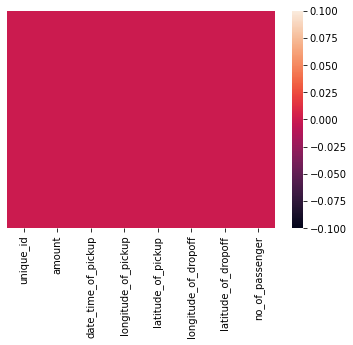

In [7]:
# Visualizing missing values

sns.heatmap(df.isna(), yticklabels = False)

In [8]:
# Numerical columns

num_cols = list(df.select_dtypes(exclude = 'O'))
print('Numerical Columns are :',num_cols)

Numerical Columns are : ['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']


In [9]:
# Categorical columns

cat_cols = list(df.select_dtypes(include = 'O'))
print('Categorical Columns are :',cat_cols)

Categorical Columns are : ['unique_id', 'date_time_of_pickup']


<AxesSubplot:>

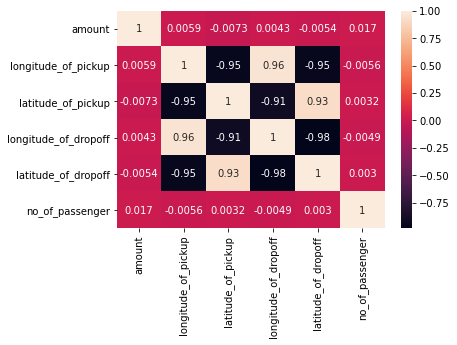

In [10]:
# Heat map
sns.heatmap(df.corr(), annot = True)

In [11]:
# No of passegers == 0

df[df['no_of_passenger'] == 0 ].size

1320

In [12]:
Index = df[df['amount'] <= 0].index
df.drop(Index, axis = 0, inplace = True)

In [13]:
# Droping high cardinality features

df.drop('unique_id', axis = 1, inplace = True)
df.sample()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
29055,11.5,2013-10-16 22:06:48 UTC,-73.951784,40.725462,-73.91438,40.708231,1


In [14]:
# Creating Distance column using Distance formula 

df['Distance'] = np.sqrt((df.latitude_of_pickup - df.latitude_of_dropoff)**2 + (df.longitude_of_pickup - df.longitude_of_dropoff)**2 )
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470


In [15]:
# Extracting Date, Time, zone from date_time_of_pickup column

df[['Date', 'Time', 'Zone']] = df.date_time_of_pickup.str.split(expand = True)
df.drop('date_time_of_pickup', axis = 1)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance,Date,Time,Zone
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009-06-15,17:26:21,UTC
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010-01-05,16:52:16,UTC
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011-08-18,00:35:00,UTC
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012-04-21,04:30:42,UTC
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010-03-09,07:51:00,UTC
...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,0.045782,2013-06-12,23:25:15,UTC
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,0.008049,2015-06-22,17:19:18,UTC
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,0.020574,2011-01-30,04:53:00,UTC
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,0.007686,2012-11-06,07:09:00,UTC


In [16]:
# Based on Time we are categorizing to six events

df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Session'] = (df['Time'].dt.hour % 24 + 4) // 4
df['Session'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance,Date,Time,Zone,Session
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009-06-15,2022-03-16 17:26:21,UTC,Evening
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010-01-05,2022-03-16 16:52:16,UTC,Evening
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011-08-18,2022-03-16 00:35:00,UTC,Late Night
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012-04-21,2022-03-16 04:30:42,UTC,Early Morning
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010-03-09,2022-03-16 07:51:00,UTC,Early Morning


In [17]:
# Adding column Weekend

df['Weekend'] = [1 if i.weekday() >= 4  else 0 for i in df.Date]
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance,Date,Time,Zone,Session,Weekend
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009-06-15,2022-03-16 17:26:21,UTC,Evening,0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010-01-05,2022-03-16 16:52:16,UTC,Evening,0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011-08-18,2022-03-16 00:35:00,UTC,Late Night,0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012-04-21,2022-03-16 04:30:42,UTC,Early Morning,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010-03-09,2022-03-16 07:51:00,UTC,Early Morning,0


In [18]:
# Encoding the categorical Variable

df1 = pd.get_dummies(df['Session'])
df = pd.concat([df,df1], axis = 1 )
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance,Date,Time,Zone,Session,Weekend,Early Morning,Evening,Late Night,Morning,Night,Noon
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009-06-15,2022-03-16 17:26:21,UTC,Evening,0,0,1,0,0,0,0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010-01-05,2022-03-16 16:52:16,UTC,Evening,0,0,1,0,0,0,0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011-08-18,2022-03-16 00:35:00,UTC,Late Night,0,0,0,1,0,0,0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012-04-21,2022-03-16 04:30:42,UTC,Early Morning,1,1,0,0,0,0,0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010-03-09,2022-03-16 07:51:00,UTC,Early Morning,0,1,0,0,0,0,0


In [19]:
# Numerical columns

num_cols = list(df.select_dtypes(exclude = 'O'))
print('Numerical Columns are :',num_cols)

Numerical Columns are : ['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger', 'Distance', 'Date', 'Time', 'Weekend', 'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Noon']


In [20]:
# Categorical columns

cat_cols = list(df.select_dtypes(include = 'O'))
print('Categorical Columns are :',cat_cols)

Categorical Columns are : ['date_time_of_pickup', 'Zone', 'Session']


In [21]:
# Droping Unwanted columns

df.drop(columns = cat_cols, axis = 1, inplace = True)

df.drop(['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff','Time','Date'], axis = 1, inplace = True)
df.head()

,amount,no_of_passenger,Distance,Weekend,Early Morning,Evening,Late Night,Morning,Night,Noon
0,4.5,1,0.009436,0,0,1,0,0,0,0
1,16.9,1,0.079696,0,0,1,0,0,0,0
2,5.7,2,0.013674,0,0,0,1,0,0,0
3,7.7,1,0.025340,1,1,0,0,0,0,0
4,5.3,1,0.019470,0,1,0,0,0,0,0


<AxesSubplot:xlabel='Distance'>

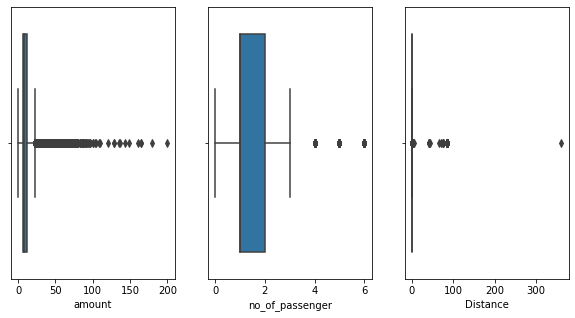

In [22]:
df1 = ['amount','no_of_passenger','Distance']

plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
sns.boxplot(df['amount'])
plt.subplot(1,3,2)
sns.boxplot(df['no_of_passenger'])
plt.subplot(1,3,3)
sns.boxplot(df['Distance'])

<AxesSubplot:xlabel='amount', ylabel='Count'>

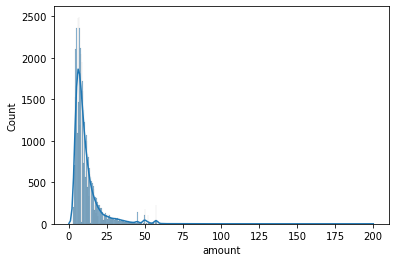

In [23]:
sns.histplot(df.amount, kde = True )

In [24]:
# Skewness

cols = ['amount', 'no_of_passenger','Distance']
df[cols] = np.sqrt(df[cols])
df.skew()

amount              1.890185
no_of_passenger     1.584520
Distance           22.398012
Weekend             0.256825
Early Morning       3.079580
Evening             1.390256
Late Night          2.556459
Morning             1.630455
Night               1.358807
Noon                1.536336
dtype: float64

In [25]:
# Scaling using minmaxscaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df))

MinMaxScaler()


# Models

In [26]:
# importing train_test_split from sklearn

from sklearn.model_selection import train_test_split

x = df.drop('amount', axis = 1)
y = df['amount']

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size = 0.30)

In [27]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, 
                               random_state=0, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
rf.fit(x_train, y_train)
#Train data
print(rf.score(x_train,y_train)*100)
#Test Data
rf.score(x_test,y_test)*100

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


92.07168295583242


[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


72.03615027200534